In [1]:
# THIS IS USED TO ANALYSE THE OUTPUT from simulation of LAMOST


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import astropy.io.fits as fits
import csv
import matplotlib.pyplot as plt
from matplotlib import cm
import math as m
import PyAstronomy as PA
from PyAstronomy import pyasl as PAP
import galpy.util.bovy_coords as gub

In [3]:
dpath = "/Users/htian/Documents/GitHub/simu_lamost/sim_lamost/"
fn = "sim_area_Ftdp050_20180923_20230923.dat"
data = pd.read_csv(dpath+fn,delim_whitespace=True)
ra = data['RA']
dec = data['DEC']
obs_date = data['OBS_DATE']
obs_time = data['OBS_TIME']
expt = data['EXPOSURE']
freq = data['EXPOSURE_TIMES']
pclass = data['PLATECLASS']

In [4]:
xd,yd = PAP.aitoff(ra,dec)
ind_tdp = pclass == "TDP"
ind_fdp = pclass == "FDP"

In [5]:
#  here is the grid 
# convert lb to aitoff projection 
nl = 2000
nb = 1000
bba = np.linspace(-90,90,nb+1)
lla = np.linspace(-180,180,nl+1)
bla = np.zeros(nl)
lba = np.zeros(nb)
b0,b30,b60,b130,b160 = 0,30,60,-30,-60
l0,l60,l120,l180,l060,l0120,l0180 = 0,60,120,180,-60,-120,-180
Xab0,Yab0 = PAP.aitoff(lla[:nl],bla+b0)
Xab30,Yab30 = PAP.aitoff(lla[:nl],bla+b30)
Xab60,Yab60 = PAP.aitoff(lla[:nl],bla+b60)
Xab130,Yab130 = PAP.aitoff(lla[:nl],bla+b130)
Xab160,Yab160 = PAP.aitoff(lla[:nl],bla+b160)

Xal0,Yal0 = PAP.aitoff(lba+l0,bba[:nb])
Xal60,Yal60 = PAP.aitoff(lba+l60,bba[:nb])
Xal120,Yal120 = PAP.aitoff(lba+l120,bba[:nb])
Xal180,Yal180 = PAP.aitoff(lba+l180,bba[:nb])
Xal060,Yal060 = PAP.aitoff(lba+l060,bba[:nb])
Xal0120,Yal0120 = PAP.aitoff(lba+l0120,bba[:nb])
Xal0180,Yal0180 = PAP.aitoff(lba+l0180,bba[:nb])

3995 3925


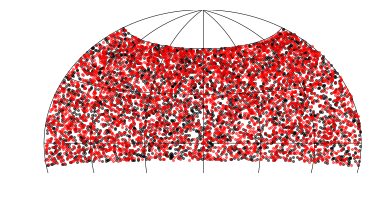

In [6]:
#  plot  aitoff  figure
lw = 0.5
fig = plt.figure(figsize=(6,3))
plt.plot(Xab0,Yab0,'k-',linewidth=lw)
plt.plot(Xab30,Yab30,'k-',linewidth=lw)
plt.plot(Xab60,Yab60,'k-',linewidth=lw)
plt.plot(Xab130,Yab130,'k-',linewidth=lw)
plt.plot(Xab160,Yab160,'k-',linewidth=lw)
plt.plot(Xal0,Yal0,'k-',linewidth=lw)
plt.plot(Xal60,Yal60,'k-',linewidth=lw)
plt.plot(Xal120,Yal120,'k-',linewidth=lw)
plt.plot(Xal180,Yal180,'k-',linewidth=lw)
plt.plot(Xal060,Yal060,'k-',linewidth=lw)
plt.plot(Xal0120,Yal0120,'k-',linewidth=lw)
plt.plot(Xal0180,Yal0180,'k-',linewidth=lw)

plt.plot(xd[ind_tdp],yd[ind_tdp],'ko',alpha=0.5,markersize=2)
plt.plot(xd[ind_fdp],yd[ind_fdp],'ro',alpha=0.5,markersize=2)
plt.axis("off")
plt.axis([-190,190,-20,90])
plt.savefig("coverage_050.eps")

print(len(xd[ind_fdp]),len(xd[ind_tdp]))

In [7]:
#  plot histogram distribution of time-dominated plates and non-time-dominated plates
# -------------------------------------------------------------------------------------
#  first column is for TIME-DOMINATED plate
#  second column is for the NON-TIME-DOMINATED plate
N_obsp = np.zeros((11,2))
TN_obsp= np.zeros(11)
T_obsp = np.zeros((11,2))
TT_obsp = np.zeros(11)
f_tdp = np.linspace(0,1,11)
print(f_tdp)
for i in range(0,11,1):
    s = "%03d"%(i*10)
    fn = "sim_area_Ftdp"+s+"_20180923_20230923.dat"
    data = pd.read_csv(dpath+fn,delim_whitespace=True)
    ra = data['RA']
    dec = data['DEC']
    obs_date = data['OBS_DATE']
    obs_time = data['OBS_TIME']
    expt = data['EXPOSURE']
    freq = data['EXPOSURE_TIMES']
    pclass = data['PLATECLASS']
    ind_tdp = pclass=="TDP"
    ind_fdp = pclass=="FDP"
    N_obsp[i,0],N_obsp[i,1] = len(pclass[ind_tdp]),len(pclass[ind_fdp])
    TN_obsp[i] = N_obsp[i,0]+N_obsp[i,1]
    T_obsp[i,0] = N_obsp[i,0]*(30+20)+sum((freq[ind_tdp]-1)*25)
    T_obsp[i,1] = N_obsp[i,1]*(30+20)+sum((freq[ind_fdp]-1)*25)
    TT_obsp[i] = T_obsp[i,0]+T_obsp[i,1]
    print(fn)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
sim_area_Ftdp000_20180923_20230923.dat
sim_area_Ftdp010_20180923_20230923.dat
sim_area_Ftdp020_20180923_20230923.dat
sim_area_Ftdp030_20180923_20230923.dat
sim_area_Ftdp040_20180923_20230923.dat
sim_area_Ftdp050_20180923_20230923.dat
sim_area_Ftdp060_20180923_20230923.dat
sim_area_Ftdp070_20180923_20230923.dat
sim_area_Ftdp080_20180923_20230923.dat
sim_area_Ftdp090_20180923_20230923.dat
sim_area_Ftdp100_20180923_20230923.dat


[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
11443.0


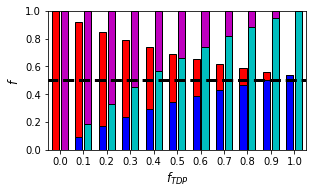

In [8]:
max_TN = np.max(TN_obsp)
max_TT = np.max(TT_obsp)
fig_hist = plt.figure(figsize=(4.5,2.8))
print(f_tdp)
plt.bar(f_tdp-0.019,N_obsp[:,0]/max_TN,width=0.03,color='b',edgecolor='k')
plt.bar(f_tdp-0.019,N_obsp[:,1]/max_TN,width=0.03,color='r',bottom=N_obsp[:,0]/max_TN,edgecolor='k')
plt.bar(f_tdp+0.019,T_obsp[:,0]/TT_obsp,width=0.03,color='c',edgecolor='k')
plt.bar(f_tdp+0.019,T_obsp[:,1]/TT_obsp,width=0.03,color='m',bottom=T_obsp[:,0]/TT_obsp,edgecolor='k')
plt.plot([-10,10],[0.5,0.5],'k--',linewidth=3)
plt.axis([-0.05,1.05,0,1])
plt.xlabel("$f_{TDP}$",fontsize=12)
plt.ylabel("$f$",fontsize=12)
plt.xticks(f_tdp)
plt.tight_layout()
plt.savefig("hist_N_T_TDP_FDP.eps")
print(max_TN)

In [9]:
days = [31,28,31,30,31,30,31,31,30,31,30,31]
days4 = [31,29,31,30,31,30,31,31,30,31,30,31]
def calc_next_day(obsdate):
    mmdd = obsdate % 10000
    dd = mmdd % 100
    mm = int(np.floor(mmdd/100))
    yyyy = int(np.floor(obsdate/10000))
    if (yyyy % 4) == 0:
        tmp_days = days4[mm-1]
    else:
        tmp_days = days[mm-1]
    if dd<=tmp_days:
        tmp_dd = dd*1
        new_dd = tmp_dd % tmp_days +1
        add_month = (tmp_dd-(tmp_dd % tmp_days))/tmp_days
        
        tmp_mm = mm
        new_mm = (tmp_mm-1+add_month) % 12 + 1
        cmm = tmp_mm+add_month-1
        new_yyyy = yyyy + (cmm-(cmm % 12))/12
        return new_yyyy*10000+new_mm*100+new_dd
    
    
def calc_interval_days(date1,date2):
    min_date = np.minimum(date1,date2)
    max_date = np.maximum(date1,date2)
    nnn = np.zeros_like(date1)
    for i in range(0,len(date1)):
        tmp_date = min_date[i]
        while (tmp_date<max_date[i]):
            tmp_date = calc_next_day(tmp_date)
            nnn[i] = nnn[i]+1
    return nnn
aa = calc_interval_days([20181223],[20190301])
print(aa)

[68]


6.13867545336   average time for each time.
3.41333593242   average time for each time.
2.45259832511   average time for each time.
1.97611514796   average time for each time.
1.69027011383   average time for each time.
1.49475736861   average time for each time.
1.35375849464   average time for each time.
1.24463624884   average time for each time.
1.16244758771   average time for each time.
1.09759616322   average time for each time.


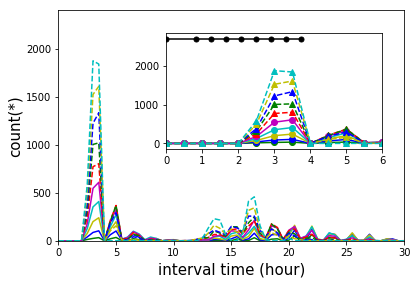

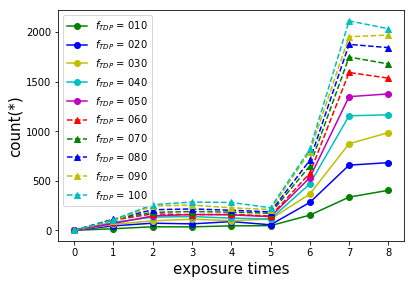

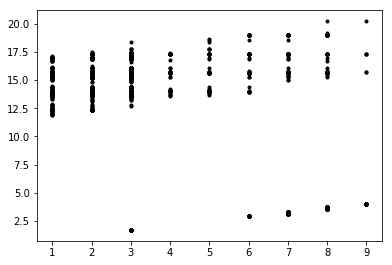

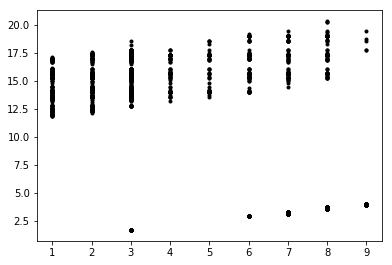

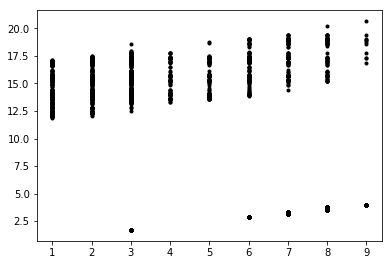

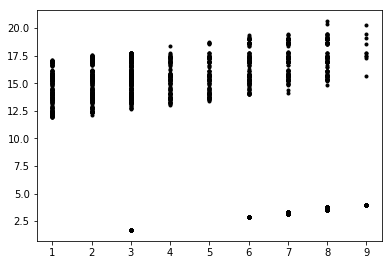

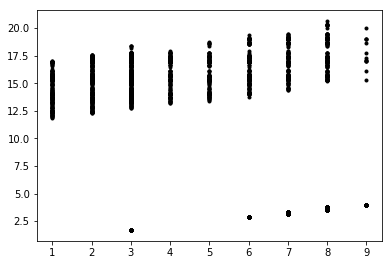

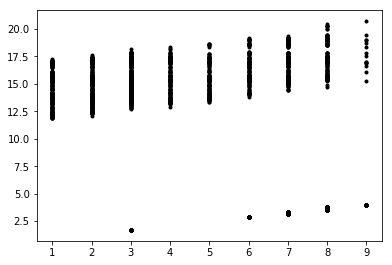

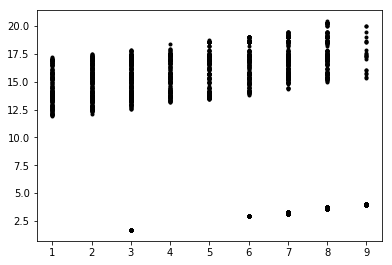

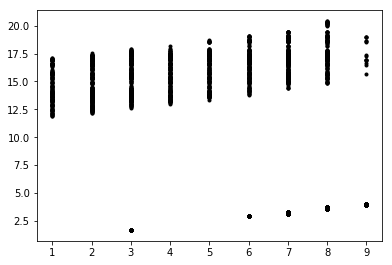

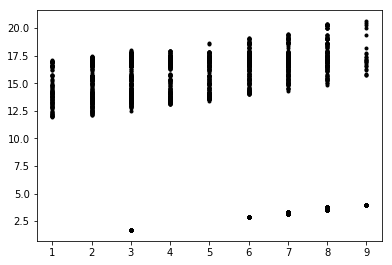

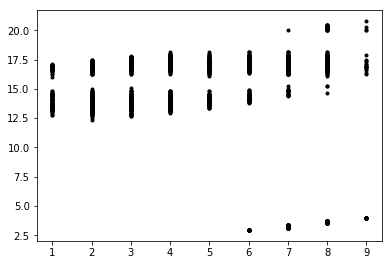

In [10]:
fmt = {'names':("RA","DEC","OBS_DATE","OBS_TIME","EXPOSURE","EXP_TIMES","PCLASS"),\
       'formats':(float,float,int,int,int,int,'3S')}
pfmt0 = ['r-','g-','b-','y-','c-','m-','r--','g--','b--','y--','c--','m--']
pfmt = ['ro-','go-','bo-','yo-','co-','mo-','r^--','g^--','b^--','y^--','c^--','m^--']
# labels = []
nbins = 96
T_min,T_max = 0,48
stp_T = (T_max-T_min)/nbins
bins_t = np.linspace(T_min,T_max,nbins+1)
nbins_n = 10
bins_n = np.linspace(0,9,nbins_n)
fig_t = plt.figure(figsize=(6,4))
fig_n = plt.figure(figsize=(6,4))
ax10 = fig_t.add_axes([0.15,0.15,0.8,0.8])
ax11 = fig_t.add_axes([0.4,0.47,0.5,0.4])
ax20 = fig_n.add_axes([0.15,0.15,0.8,0.8])
for i in range(1,11,1):
    s = "%03d"%(i*10)
    fn = "sim_area_Ftdp"+s+"_20180923_20230923.dat"
#     data = pd.read_csv(dpath+fn,delim_whitespace=True)
#     ra = data['RA']
#     dec = data['DEC']
#     obs_date = data['OBS_DATE']
#     obs_time = data['OBS_TIME']
#     expt = data['EXPOSURE']
#     freq = data['EXPOSURE_TIMES']
#     pclass = data['PLATECLASS']
    ra,dec,obs_date,obs_time,expt,freq,pclass = np.loadtxt(dpath+fn,skiprows=2,\
        dtype={'names':('RA','DEC','OBS_DATE','OBS_TIME','EXPOSURE','EXP_TIMES','PCLASS'),\
       'formats':(float,float,int,int,int,int,'3S')},unpack=True,usecols=(0,1,2,3,4,5,6))
    pclass = pclass.astype(str)
    ind_tdp = pclass=="TDP"
    ind_fdp = pclass=="FDP"
    ra_tdp = ra[ind_tdp]
#     ra_fdp = ra[ind_fdp]
    dec_tdp = dec[ind_tdp]
    obs_date_tdp = obs_date[ind_tdp]
    obs_time_tdp = obs_time[ind_tdp]
    freq_tdp = freq[ind_tdp]
    
    hh = np.floor(obs_time_tdp/10000)
    mm = np.floor((obs_time_tdp % 10000)/100)
    ss = obs_time_tdp % 100
    obs_time_tdp_s = hh*3600 + mm * 60 + ss
    np_tdp = len(ra_tdp)
    int_days = calc_interval_days(obs_date_tdp[:np_tdp-1],obs_date_tdp[1:])
    
    int_days_all = calc_interval_days(obs_date[:len(obs_date)-1],obs_date[1:])
    
    t1 = int_days*24*60*60   #convert to second
    t2 = obs_time_tdp_s[1:]-obs_time_tdp_s[:np_tdp-1]
    tt = (t1+t2)/3600
    hy,hx = np.histogram(tt,bins=bins_t)
    ax10.plot(hx[:nbins],(hy),pfmt0[i])
    ax11.plot(hx[:nbins],(hy),pfmt[i])

    hyn,hxn = np.histogram(freq_tdp,bins = bins_n)
    ax20.plot(hxn[:nbins_n-1],hyn,pfmt[i],label = "$f_{TDP}$ = "+s)
    
    hha = np.floor(obs_time/10000)
    mma = np.floor((obs_time % 10000)/100)
    ssa = obs_time % 100
    obs_time_a = hha*3600 + mma * 60 + ssa
    t1_all = int_days_all*24*3600
    t2_all = obs_time_a[1:]-obs_time_a[:len(obs_time_a)-1]
    fig_nt = plt.figure(figsize=(6,4))
    ax00 = fig_nt.add_axes([0.15,0.15,0.8,0.8])
    ax00.plot(freq[:len(freq)-1],(t1_all+t2_all)/3600,'k.')
#     ax00.plot(freq_tdp[:len(freq_tdp)-1],tt,'ro')
    fig_nt.savefig("N_T_A"+s+".eps")
    print(np.sum(tt)/np.sum(freq_tdp),"  average time for each time.")
ax10.set_xlabel("interval time (hour)",fontsize=15)
ax10.set_ylabel("count(*)",fontsize=15)
sns = np.zeros(9)
stimes = np.zeros(9)
sns[1:] = np.linspace(1,8,8)
stimes[1:] = (50+(sns[1:]-1)*25)/60
ax11.plot(stimes,np.zeros_like(sns)+2700,'ko-',markersize=5)
# ax11.plot(stimes[:8],np.zeros_like(sns[:8])+2700,'ro-',markersize=5)
# ax11.plot(stimes[:7],np.zeros_like(sns[:7])+2700,'yo-',markersize=5)
# ax11.plot(stimes[:6],np.zeros_like(sns[:6])+2700,'go-',markersize=5)
# ax11.plot(stimes[:5],np.zeros_like(sns[:5])+2700,'bo-',markersize=5)
# ax11.plot(stimes[:4],np.zeros_like(sns[:4])+2700,'co-',markersize=5)
# ax11.plot(stimes[:3],np.zeros_like(sns[:3])+2700,'mo-',markersize=5)
# ax11.plot(stimes[:2],np.zeros_like(sns[:2])+2700,'ro-',markersize=5)
ax10.set_xlim([0,30])
ax11.set_xlim([0,6])
ax10.set_ylim([0,2400])
ax20.legend(loc=2)
ax20.set_xlabel("exposure times",fontsize=15)
ax20.set_ylabel("count(*)",fontsize=15)
fig_n.savefig("hist_N.eps")
fig_t.savefig("hist_intervalT.eps")


In [11]:
a = np.linspace(1,10,10)
b = a+2
print(a % 3)

c = np.array([1,2,3,4,1,2,4,2,5])
bins = np.linspace(1,6,6)
hy,hx = np.histogram(c,bins=bins)
print(hx)
print(np.max(obs_time_tdp))
print(np.floor(np.max(obs_time_tdp)/10000))

[ 1.  2.  0.  1.  2.  0.  1.  2.  0.  1.]
[ 1.  2.  3.  4.  5.  6.]
292052
29.0
